# ***Premise***
---
---

# ***Questions***
---
---

+ **Easy**
    + Which year had the most meteors?
    + What is the average mass of a meteors we've observed?
+ **Hard**
    + Are there more meteors around the equator or the poles?
    + What time of year got the most asteroids?
+ **Other**
    + How many meteors fell in important years (birth year(1995), Y2K, 2008(Obama), 2020(Now))?


# ***Tasks***
---
---

- [ ] Histogram of meteors size
- [ ] Histogram of years
- [ ] Correlation of ___ to ___
- [ ] Drop unnecessary columns (nametype)

# ***Concepts to cover***
---
---

- [x] Histograms
- [ ] PDF
- [ ] CDF
- [ ] Hypothesis Testing
- [ ] Confidence Interval
- [ ] Correlation
- [ ] Outliers
- [ ] Normal Distribution
- [ ] Time Analysis

# ***Imports***
---
---

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# ***Data***
---
---

In [63]:
data = pd.read_csv('../data/meteorite-landings.csv')
print(data.columns)

data.head()


Index(['name', 'id', 'nametype', 'recclass', 'mass', 'fall', 'year', 'reclat',
       'reclong', 'GeoLocation'],
      dtype='object')


,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775000, 6.083330)"
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.183330, 10.233330)"
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.216670, -113.000000)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.883330, -99.900000)"
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.166670, -64.950000)"


## Basic Statistics

In [3]:
print("Data described: \n")
print(data.describe())
print('\n')
print("Data info: \n")
print(data.info())

Data described: 

                 id          mass          year        reclat       reclong
count  45716.000000  4.558500e+04  45428.000000  38401.000000  38401.000000
mean   26889.735104  1.327808e+04   1991.772189    -39.122580     61.074319
std    16860.683030  5.749889e+05     27.181247     46.378511     80.647298
min        1.000000  0.000000e+00    301.000000    -87.366670   -165.433330
25%    12688.750000  7.200000e+00   1987.000000    -76.714240      0.000000
50%    24261.500000  3.260000e+01   1998.000000    -71.500000     35.666670
75%    40656.750000  2.026000e+02   2003.000000      0.000000    157.166670
max    57458.000000  6.000000e+07   2501.000000     81.166670    354.473330


Data info: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45716 entries, 0 to 45715
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         45716 non-null  object 
 1   id           45716 non-null  int64  
 2   n

*Conclusions / Questions*
    - There are missing values in mass, year, and locations
    - Appropriate data types thus far

# ***Cleaning***
---
---
- [ ] Drop NaN?
- [x] Convert Dates
- [x] Adjust Data Types
- [x] Change Column Names
- [ ] Select proper Geolocation formatting
- [x] Select test data (use `.sample()`)

## Rename columns

In [60]:
data.rename(columns={'recclass':'class', 'reclat':'lat', 'reclong':'long'}, inplace=True)
data

,name,id,nametype,class,mass,fall,year,lat,long,GeoLocation
23880,Meteorite Hills 01189,16421,Valid,LL5,11.40,Found,2001.0,-79.68333,159.75000,"(-79.683330, 159.750000)"
34205,Queen Alexandra Range 97594,21050,Valid,LL5,29.50,Found,1997.0,-84.00000,168.00000,"(-84.000000, 168.000000)"
25478,Miller Range 090404,54972,Valid,L5,98.00,Found,2009.0,0.00000,0.00000,"(0.000000, 0.000000)"
24844,Miller Range 07470,52298,Valid,LL5,12.40,Found,2007.0,0.00000,0.00000,"(0.000000, 0.000000)"
17740,LaPaz Icefield 031038,34823,Valid,LL5,0.49,Found,2003.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
23273,Meteorite Hills 00579,15814,Valid,L6,55.86,Found,2000.0,-79.68333,155.75000,"(-79.683330, 155.750000)"
36906,Sayh al Uhaymir 001,23193,Valid,L5,450000.00,Found,2000.0,20.51667,56.66667,"(20.516670, 56.666670)"
23330,Meteorite Hills 00637,15871,Valid,L4,7.23,Found,2000.0,-79.68333,155.75000,"(-79.683330, 155.750000)"
1696,Allan Hills 82135,511,Valid,CK4,12.10,Found,1982.0,-76.91276,156.97559,"(-76.912760, 156.975590)"


*Conclusions / Questions*
    - ...

## Sampling
---
## (Test sample size is set to 10%)
## **Only comment out once all testing / experiment is done, to use real data)**

In [5]:
# *****************************
# HIGHLY IMPORTANT
# *****************************

# Sample data
print("Original Data Stats: \n")
print(data.describe())

print('\n--------\n')

print("New Sample Data Stats: \n")
data['year'].fillna(0).astype(int)
data['mass'].fillna(0).astype(int)

data = data.sample(frac=0.1)  # 10% sample set
print(data.describe())

Original Data Stats: 

                 id          mass          year        reclat       reclong
count  45716.000000  4.558500e+04  45428.000000  38401.000000  38401.000000
mean   26889.735104  1.327808e+04   1991.772189    -39.122580     61.074319
std    16860.683030  5.749889e+05     27.181247     46.378511     80.647298
min        1.000000  0.000000e+00    301.000000    -87.366670   -165.433330
25%    12688.750000  7.200000e+00   1987.000000    -76.714240      0.000000
50%    24261.500000  3.260000e+01   1998.000000    -71.500000     35.666670
75%    40656.750000  2.026000e+02   2003.000000      0.000000    157.166670
max    57458.000000  6.000000e+07   2501.000000     81.166670    354.473330

--------

New Sample Data Stats: 

                 id          mass         year       reclat      reclong
count   4572.000000  4.559000e+03  4547.000000  3831.000000  3831.000000
mean   26743.494969  3.514359e+03  1991.663075   -38.753437    62.429695
std    16905.518925  4.668500e+04    3

*Conclusions / Questions*
    - ...

# ***Statistical Plotting***
---
---

## Fall vs Fallen Histogram

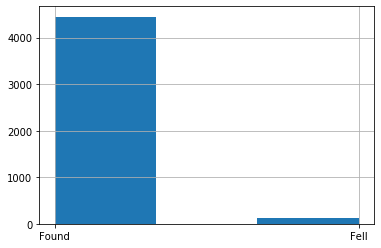

In [30]:
data['fall'].hist(bins=3)  # 
plt.show()

*Conclusions / Questions*
    - ...

## Box Plot

*Conclusions / Questions*
    - ...

## PDF

*Conclusions / Questions*
    - ...

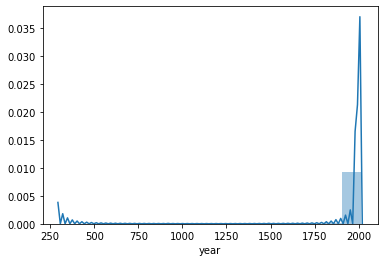

In [42]:
sns.distplot(data['year'].dropna(), hist=True, kde=True, bins=16)

*Conclusions / Questions*
    - ...

## CDF

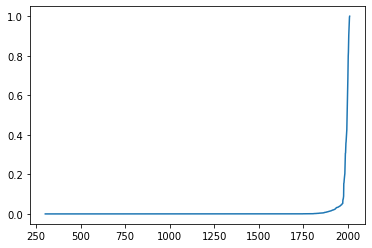

In [51]:
ls_year = data['year'].dropna().values

def calculate_cdf(x, threshold):
    return np.sum(x <= threshold)

# Create an array cdf_age where each value is the cdf of the age for each threshold
cdf_year = [calculate_cdf(ls_year, r)/len(ls_year) for r in range(int(np.min(ls_year)), int(np.max(ls_year)))]

plt.plot(range(int(np.min(ls_year)), int(np.max(ls_year))), cdf_year)


*Conclusions / Questions*
    - ...

## Violin Plot

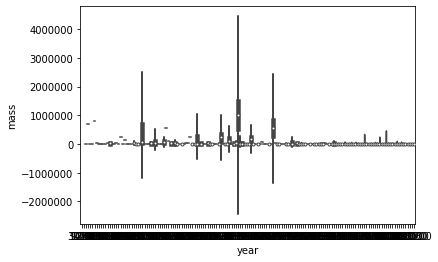

In [46]:
sns.violinplot(x="year", y="mass", data=data)


*Conclusions / Questions*
    - Why are the masses in the violin plot negative?

# ***Various Plotting***
---
---

## See the top 10 classification of meteors

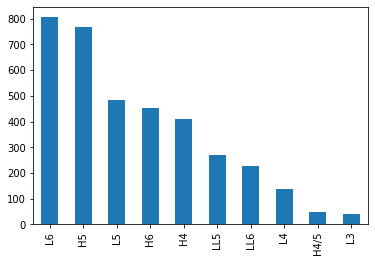

In [27]:
top_10_class = data['class'].value_counts()[:10]
plt.bar(top_10_class, height = 1)

top_10_class.plot(kind='bar')

*Conclusions / Questions*
    - ...

## Lat and Long scatter plot, using mass as bubble size

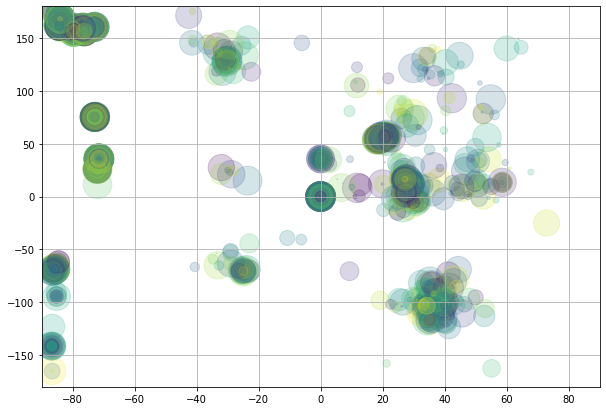

In [12]:
plt.figure(figsize=(10,7))
N = len(data['mass'])
area = (30 * np.random.rand(N))**2  # 0 to 15 point radii
colors = np.random.rand(N)
plt.scatter(data['lat'], data['long'], s=area, c=colors, alpha=0.2)

plt.grid(True)
axes = plt.gca()
axes.set_xlim([-90,90])
axes.set_ylim([-180,180])
plt.show()

*Conclusions / Questions*
    - ...

In [9]:
print(data['year'].value_counts())
# data['recclass'].value_counts().plot(kind='bar')  # bar chart of the amount embarked passengers by class

2003.0    325
1979.0    293
1998.0    288
2006.0    256
1988.0    230
         ... 
1945.0      1
1808.0      1
1952.0      1
1966.0      1
1860.0      1
Name: year, Length: 154, dtype: int64


## Time Analysis

In [10]:
data['year'].fillna(0).astype(int)


23880    2001
34205    1997
25478    2009
24844    2007
17740    2003
         ... 
23273    2000
36906    2000
23330    2000
1696     1982
10587    1990
Name: year, Length: 4572, dtype: int64

*Conclusions / Questions*
    - ...